# Physics and Astrophysics

## Orbital Dynamics
Dynamical studies of planetary bodies characterize their orbital motion, rotation (including changes in obliquity), and deformation resulting from tidal distortions.  Dynamics is the oldest discipline in the planetary sciences.  

- Gravitational interactions determine how the a planet's distance from the Sun varies over time and thus how much solar radiation the planet receives.
- Rotation rates determine the length of the day.
- Obliquity influences the temperature differences between the pole and equator, as well as seasonal variations.
- Tidal heating (from tidal distortions) produces extensive volcanism on bodies such as Jupiter's moon Io.
  
The study of planetary motions dates back to antiquity through observational studies and kinematic modeling.  Modern planetary dynamics begins (in earnest) during the 17th century with Johannes Kepler and [Tycho Brahe](https://en.wikipedia.org/wiki/Tycho_Brahe).  Brahe had taken the finest planetary observations in all of Europe, and after his death, Kepler used his results in an extensive mathematical analysis.  Later, Isaac Newton provided a firm basis for dynamical studies using universal physical laws (i.e., applicable on Earth and in the heavens).  

in 1687, Newton showed that the relative motion of two spherically symmetric bodies resulting from their mutual gravitational attraction is described by simple conic sections:

- ellipses for bound orbits and parabolas;
- hyperbolas for unbound trajectories.

Albert Einstein's theories of relativity (Special and General) fundamentally modified the underlying theories of motion and gravity, but the relativistic corrections to planetary motions is generally quite small.

```{note}
All bodies in the Universe are subject ot the gravitational attraction of *all* other bodies.  However, the trajectory of one body is well approximated by considering just the gravitational force exerted on it by a *single* other body.
```

### Kepler's Laws of Planetary Motion
By careful analysis of the observed orbits of planets, Kepler deduced his three laws of planetary motion:


1. *All planets move along elliptical paths with the Sun at one focus.*  The shape of an ellipse is characterized by two parameters: the **semimajor axis** $a$ (i.e., the average of the minimum and maximum heliocentric distances), and the **eccentricity** (i.e., the fraction by which the focus is displaced from the center).  Locating a point on an ellipse is accomplished through the **true anomaly** $f$ that is the angle between the planet's **perihelion** (closest approach to the Sun) and its instantaneous position.
   
   ```{glue:figure} orbit_fig
   :figwidth: 600px
   :name: "orbit_ellipse"

   Elliptical orbit $(e=0.5)$ with the Sun (yellow dot) at one focus, and the planet is 15 days $(f=47.4^\circ)$ past past perihelion (cyan dot).  The major axis (red line) connects the aphelion (blue dot) to the perihelion, where the semimajor axis $(a=1\ \rm AU)$ connects to the center (black dot) of the ellipse.  The minor axis (magenta line) is perpendicular to the major axis, where the semiminor axis $(b=0.866\ \rm AU)$ is its respective half-length.
   ```
   
   The **heliocentric distance** $r$ of a planet (i.e., its instantaneous distance from the Sun) can be determined using the semimajor axis, eccentricity, and true anomaly, by:  <br> <br>

   ```{math}
   :label: distance
   r = \frac{a\left(1-e^2 \right)}{1 + e \cos f}.
   ```

   The eccentricity can be defined by the *semiminor* axis $b$, which is half of the minor axis of an ellipse that lies perpendicular to the major axis.  Mathematically, this is given as, <br> <br>

   \begin{align*} e \equiv \sqrt{1- \left( \frac{b}{a} \right)^2 }. \end{align*}

   
2. *A line connecting any given planet and the Sun sweeps out an area $\mathcal{A}$ at a constant rate.*  Mathematically, this is given as, <br> <br>

   ```{math}
   :label: constant_area
   \frac{d \mathcal{A}}{dt} = \text{constant}.
   ```

   ```{glue:figure} area_fig
   :figwidth: 600px
   :name: "area_ellipse"

   Elliptical orbit (from Fig. {numref}`{number}<orbit_ellipse>`), where the time interval between points is about 30.44 days.  Kepler's second law states that each area (white or black) is equivalent for an equal time interval.
   ```
   
3. *The square of a planet's orbital period $P$ about the Sun (in **years**) is equal to the cube of its semimajor axis $a$ (in **AU**)*, or <br> <br>

   ```{math}
   :label: harmonic_law
   P^2 = a^3.
   ```

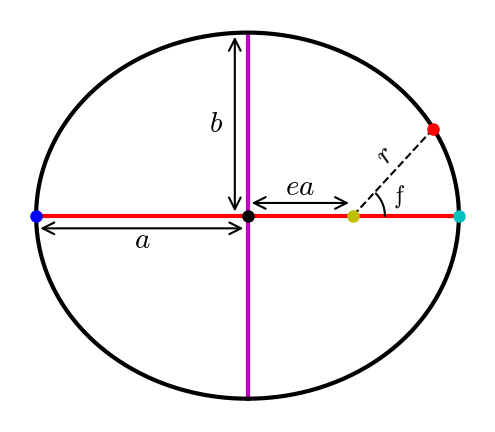

In [1]:
#Code to create Fig 2.1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

def grav(x,t):
    #derivative function for the two body problem in astrocentric coordinates
    #state function x = {x,y,z,vx,vy,vz}
    xp = np.zeros(6)
    xp[:3] = x[3:] #{vx,vy,vz}
    r = np.sqrt(np.sum(np.square(x[:3]))) #calculate the separation vector r
    xp[3:] = -G*M_star*x[:3]/r**3
    return xp

def Orb2Cart(a,e,omg,f):
    #Calculate the Cartesian state given orbital elements (a,e,omega,f)
    temp = np.zeros(6)
    r = a*(1-e**2)/(1+e*np.cos(f))
    n = np.sqrt(G*M_star/a**3) #mean motion n
    rdot = n*a*e*np.sin(f)/np.sqrt(1.-e**2)
    rfdot = n*a*(1+e*np.cos(f))/np.sqrt(1.-e**2)
    omg_f = omg + f 

    temp[:3] = [r*np.cos(omg_f), r*np.sin(omg_f), 0.]
    temp[3:] = [rdot*np.cos(omg_f) - rfdot*np.sin(omg_f),rdot*np.sin(omg_f) + rfdot*np.cos(omg_f),0]
    return temp
    

G = 4*np.pi**2 #Constant for Universal Gravitation (units: AU, yr, M_sun)
M_star = 1 #Solar mass
a,e,omg,f = 1,0.5,0,0
x_o = Orb2Cart(a,e,omg,f)
r_p, r_a = 0.5, -1.5
b = a*np.sqrt(1-e**2)
t_rng = np.arange(0,1.,1./365.25)
sol = odeint(grav, x_o, t_rng)

fs = 'medium'
lw = 2

fig = plt.figure(figsize=(4,4),dpi=150)
ax = fig.add_subplot(111)


ax.plot([r_a,-0.5],[0,0],'r-',lw=lw)
ax.plot([-0.5,r_p],[0,0],'r-',lw=lw)
ax.plot([-0.5,-0.5],[0,b],'m-',lw=lw)
ax.plot([-0.5,-0.5],[0,-b],'m-',lw=lw)

ax.text(-0.65,0.4,'$b$',horizontalalignment='center')
ax.annotate('', xy=(-0.56, 0), xytext=(-0.56, b), arrowprops=dict(arrowstyle='<->', color='k'))

ax.text(-1,-0.15,'$a$',horizontalalignment='center')
ax.annotate('', xy=(r_a, -0.06), xytext=(-0.5, -0.06), arrowprops=dict(arrowstyle='<->', color='k'))

ax.text(-0.25,0.1,'$ea$',horizontalalignment='center')
ax.annotate('', xy=(-0.5, 0.06), xytext=(0, 0.06), arrowprops=dict(arrowstyle='<->', color='k'))

ax.plot(-0.5,0,'k.',ms=10)
ax.plot(sol[:,0],sol[:,1],'k-',lw=lw)
ax.plot(r_p,0,'c.',ms=10)
ax.plot(r_a,0,'b.',ms=10)

ax.plot([0,sol[15,0]],[0,sol[15,1]],'k--',lw=1)
ax.plot(sol[15,0],sol[15,1],'r.',ms=10)
ax.plot(0,0,'y.',ms=10)
ax.text(0.15,0.25,'$r$',horizontalalignment='center',rotation=50)
ax.text(0.22,0.06,'$f$',horizontalalignment='center',rotation=10,fontsize='small')

arc_r = 0.15
ang_rng = np.radians(np.arange(0,45,1))
arc_x, arc_y = arc_r*np.cos(ang_rng), arc_r*np.sin(ang_rng)
ax.plot(arc_x,arc_y,'k-',lw=1)

#ax.set_xticks(np.arange(-1.5,1.5,0.5))
#ax.set_yticks(np.arange(-1,1.1,0.5))
ax.set_aspect('equal')
ax.axis('off')

glue("orbit_fig", fig, display=False);

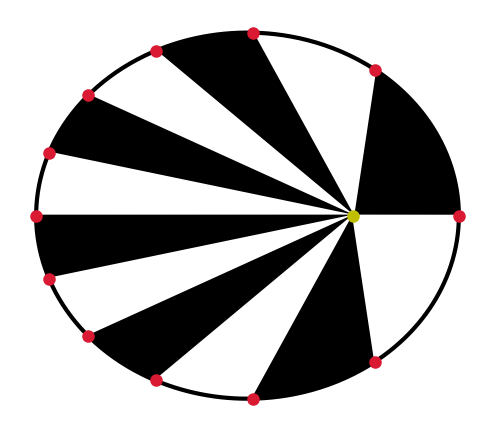

In [2]:
#Code to create Fig 2.2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.integrate import odeint
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

def grav(x,t):
    #derivative function for the two body problem in astrocentric coordinates
    #state function x = {x,y,z,vx,vy,vz}
    xp = np.zeros(6)
    xp[:3] = x[3:] #{vx,vy,vz}
    r = np.sqrt(np.sum(np.square(x[:3]))) #calculate the separation vector r
    xp[3:] = -G*M_star*x[:3]/r**3
    return xp

def Orb2Cart(a,e,omg,f):
    #Calculate the Cartesian state given orbital elements (a,e,omega,f)
    temp = np.zeros(6)
    r = a*(1-e**2)/(1+e*np.cos(f))
    n = np.sqrt(G*M_star/a**3) #mean motion n
    rdot = n*a*e*np.sin(f)/np.sqrt(1.-e**2)
    rfdot = n*a*(1+e*np.cos(f))/np.sqrt(1.-e**2)
    omg_f = omg + f 

    temp[:3] = [r*np.cos(omg_f), r*np.sin(omg_f), 0.]
    temp[3:] = [rdot*np.cos(omg_f) - rfdot*np.sin(omg_f),rdot*np.sin(omg_f) + rfdot*np.cos(omg_f),0]
    return temp

def get_ellipse(x1,x2,a,b,cnt):
    xy = np.zeros((12,2))
    xy[1:,0] = np.linspace(x1,x2,11)
    p = 1-((xy[1:,0]+0.5)/a)**2
    y = b*np.sqrt(p)
    if cnt > 5:
        y *= -1
    xy[1:,1] = y
    return xy

G = 4*np.pi**2 #Constant for Universal Gravitation (units: AU, yr, M_sun)
M_star = 1 #Solar mass
a,e,omg,f = 1,0.5,0,0
x_o = Orb2Cart(a,e,omg,f)
r_p, r_a = 0.5, -1.5
b = a*np.sqrt(1-e**2)
t_step = 1./360.
t_rng = np.arange(0,1.+t_step,t_step)
sol = odeint(grav, x_o, t_rng)

fs = 'medium'
lw = 2
col = (218/256., 26/256., 50/256.)

fig = plt.figure(figsize=(4,4),dpi=150)
ax = fig.add_subplot(111)

ax.plot(0,0,'y.',ms=10)
ax.plot(sol[:,0],sol[:,1],'k-',lw=lw)
cnt = 0
n = 30
i_rng = int(len(sol)/n)
for i in range(0,i_rng):
    if cnt % 2 == 0:
        color = 'k'
    else:
        color = 'white'
    i_1,i_2 = n*i,n*(i+1)
    if i_2 > len(sol):
        i_2 = 0
    x_1,x_2 = sol[i_1,0],sol[i_2,0]
    y_1,y_2 = sol[i_1,1],sol[i_2,1]
    verts = get_ellipse(x_2,x_1,a,b,cnt)

    p1 = Polygon(verts,color=color)
    ax.add_artist(p1)
    ax.plot(x_1,y_1,'.',color=col,ms=10)

    cnt += 1

ax.set_aspect('equal')
ax.axis('off')

glue("area_fig", fig, display=False);

### Newton's Laws of Motion and Gravity
Isaac Newton developed the first *physical* model that explained the motion of objects using a single unified theory.  Newton's theory includes three laws of motion and one law of universal gravitation.

- **Newton's first law**: *A body remains at rest or in uniform motion unless a force is exerted upon it.*  It is also called the law of inertia and is a restatement of Galileo Galilei's work from the first half of 17th century.
- **Newton's second law**: *When a body is acted upon by a force, the time rate of change of its momentum equals the force.*  Consider a body of mass $m_1$ that is located using a position vector $\vec{r}_1$.  The body has an instantaneous velocity $\vec{v}_1 \equiv d\vec{r}_1/dt$, where its momentum $\vec{p}_1$ represents the product of the mass and velocity (i.e., $\vec{p}_1 = m_1\vec{v}_1$).  The acceleration produced by a net force $\vec{F}_1$ is <br> <br>
    
    ```{math}
    :label: Newtons_2nd
    \vec{F}_1 = \frac{d(m_1\vec{v}_1)}{dt} = m_1 \frac{d\vec{v}_1}{dt}.
    ```

- **Newton's third law**: **If a body $1$ that exerts a force on another body $2$, there is a force of equal magnitude and opposite direction exerted by body $2$ onto body $1$.  Mathematically, this is given as <br> <br>

    ```{math}
    :label: Newtons_3rd
    \vec{F}_{12} = -\vec{F}_{21},
    ```

    where the subscript $12$ denotes the force exerted by body $1$ on body $2$ and vice versa for $21$.
    
- **Newton's universal law of gravity**: *Every body in the universe exerts an attractive force on every other body that is directly proportional to the product of their masses and the inverse square of the distance between them.*  Consider two masses $m_1$ and $m_2$, the gravitational force between the bodies is given as <br> <br>

    ```{math}
    :label: Newtons_gravity
    \vec{F}_{12} = -\frac{Gm_1m_2}{r^3}\vec{r}_{12} = -\frac{Gm_1m_2}{r^2}\hat{r}_{12}.
    ```

    The gravitational force depends on the relative separation of the bodies through the vector difference $\vec{r}_{12} = \vec{r}_1 - \vec{r}_2$, where the unit vector <br> <br> 
    
    $$ \hat{r}_{12} \equiv \frac{\vec{r}_{12}}{|\vec{r}_{12}|}. $$

    It additionally depends on the universal gravitational constant $G$.

Kepler deduced his laws of planetary motion from careful observation, but they were subsequently shown to be derivable from Newton's laws of motion together with the universal law of gravity.  

### Bound and Unbound Orbits

For a pair of bodies to travel on a circular orbit about their mutual center of mass $M_{com}$, they must be pulled towards one another enough to balance inertia.  Gravity must balance the centrifugal *pseudoforce* that arises if the problem is viewed as a steady state in a reference frame that is rotating with the angular velocity $n$ of the two bodies.  This angular velocity is also called the *mean motion* and is represented as

$$ n \equiv \frac{2\pi}{P} = \sqrt{\frac{GM_{com}}{a^3}}. $$

The **centripetal force** necessary to keep an object of mass $m$ in a circular orbit of radius $r$ with a speed $v_c$ is

```{math}
:label: centripetal
\vec{F}_c = mn^2\vec{r} = \frac{mv_c^2}{r}\hat{r}.
```

The speed $v_c$ of a circular orbit can be found by equating the centripetal force to the gravitational force exerted by the central body with a mass $M$.  This results in

```{math}
:label: circular_vel
v_c = \sqrt{\frac{GM}{r}}.
```

The total energy $E$ of the system is a conserved quantity, which means that it is equal to the sum of the kinetic energy $(K = mv^2/2)$ and the potential energy $U = -GMm/r$.  For circular orbits $r=a$, which gives

```{math}
:label: grav_tot_energy
E &= \frac{1}{2}mv^2 - \frac{GMm}{r}, \\
&= \frac{GMm}{2a} - \frac{GMm}{a} = -\frac{GMm}{2a}.
```

If $E<0$, then the magnitude of the potential energy is larger than the kinetic energy of the mass.  The system is **bound** because the mass $m$ lacks a sufficient amount of kinetic energy to escape.  The mass $m$ orbits the central mass $M$ on an elliptical path.

```{note}
The equation for the total energy is degenerate regarding elliptical or circular orbits.  Notice that our expression in Eqn. {eq}`grav_tot_energy` does not depend on eccentricity at all.
```

The velocity along an elliptical orbit $v_{ell}$ can be derived from Eqn. {eq}`grav_tot_energy` to get

```{math}
:label: elliptical_vel
v_{ell} = \sqrt{GM\left(\frac{2}{r}-\frac{1}{a}\right)},
```

which is known as the [vis viva equation](https://en.wikipedia.org/wiki/Vis-viva_equation).

If $E>0$, the mass $m$ can escape because its kinetic energy is now larger than the magnitude of the potential energy.  The system is **unbound**, and the orbit is described mathematically as a hyperbola.  If the kinetic energy exactly equals the magnitude of the potential energy (i.e., $K = |U|$), then $E=0$ and the orbit is a parabola.

Using the condition for a parabolic orbit $E=0$, we can determine the **escape velocity** at any separation, or

```{math}
:label: escape_speed
v_{esc} = \sqrt{\frac{2GM}{r}} = \sqrt{2}v_c.
```

The orbit in the two body problem is an ellipse, parabola, or hyperbola, which depends on whether the total energy is negative, zero, or positive, respectively.  Geometrically, these curves are known as [conic sections](https://en.wikipedia.org/wiki/Conic_section) and are illustrated in Fig. {numref}`{number}<conic-sections>`.

```{figure-md} conic-sections
<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/Conic_Sections.svg" alt="conic sections"  width="400px">

The black boundaries of the colored regions are conic sections. Image credit: Wikipedia:[conic sections](https://en.wikipedia.org/wiki/Conic_section) by user:Magister_Mathematicae.
```

Equation {eq}`distance` can be generalized to include unbound orbits to get

```{math}
:label: general_distance
r = \frac{\zeta}{1+e\cos f},
```

which depends on the **generalized eccentricity** $e$ and a constant $\zeta$.  The true anomaly $f$ and distance $r$ carry the same meaning as in Eqn. {eq}`distance`.  The constant $\zeta$ is defined as:

```{math}
:label: general_ecc
\zeta = 
\begin{cases}
    a\left(1-e^2\right), \qquad & (e<1) \\[5pt]
    2q, \qquad & (e = 1) \\[5pt]
    q\left(1+e\right). \qquad & (e>1) 
\end{cases}
```

The **pericentric separation** $q$ is the distance of closest approach.  For all orbits the three orientation angles $i$, $\omega$, and $\Omega$ carry the same definitions as in the elliptical case.

The energy of an orbit is uniquely specified by its semimajor axis $a$, but the magnitude of the angular momentum $|\vec{L}|$ depends on both the semimajor axis and eccentricity by

```{math}
:label: ang_momentum
|\vec{L}| = mvr =  m\sqrt{GMa(1-e^2)},
```

which can be derived using Eqns. {eq}`distance` and {eq}`elliptical_vel` at the pericenter ($f=0^\circ$).

For a given semimajor axis, a circular orbit contains the maximum amount of angular momentum.  This occurs because when $r=a$ for an eccentric orbit, the magnitude of the velocity is the same as an equivalent circular orbit (via conservation of energy), but not all of the velocity is directed perpendicular to the line connecting the two bodies.

## Connections Between Physics, Astrophysics, and Planetary Science
A planet is composed of $\sim 10^{50}$ molecules, which is a number so larger that it is impossible to model planets on a molecule-by-molecule bases.  Properties of matter are instead analyzed in a statistical sense to reveal the bulk behavior of the matter in planetary bodies.  

The radial structure of planets and stars is determined by a balance of the inward gravitational force and the resistance to collapse provided by a pressure gradient.  This balance plays a major role in determining the size and density of a body, whether it will remain bound as a single object, and its internal energy transport.

The Sun is the dominant body in our Solar System, where it provides us with warmth and holds the system together with its gravity.  Without it there would be no life on Earth's surface.  The properties of stars are key to the habitability of planets orbiting them, where habitability refers to the *potential* for an environment conducive to hosting life as we know it.

The properties of a planetary system depend on the composition of individual bodies.  Some elements formed in the early universe just minutes after the big bang, while most others formed in the interiors of stars, through radioactive decay, or through various processes in interstellar space that can affect the balance elements in our Solar System.

## Thermodynamics
The study of heat and energy transfer is called **thermodynamics**, where transfers can occur between systems and between different states of matter.  Systems are seen macroscopically (i.e., analyzing large groups) rather than microscopically (i.e., motions of constituent molecules).  

For example, discontinuous phase transitions in a material demonstrate when the **latent heat of transformation** is absorbed or liberated, which can be induced by melting, boiling, sublimation, or condensation.  Thermodynamics is important in every branch of science, including atmospheric physics, rock formation, and biology. 

### Laws of Thermodynamics
In classical thermodynamics, **closed systems** are studied, where mass transfer to and from the external environment are not permitted.  Energy transfer can take place across the boundary of a closed system.  In contrast, an **open system** allows mass and energy to freely flow between the system and its environment.

Closed systems are in equilibrium, where this is known as the [zeroth law of thermodynamics](https://en.wikipedia.org/wiki/Zeroth_law_of_thermodynamics).  *If two systems with different temperatures are combined into one closed system, eventually they will reach the same temperature and be in thermodynamic equilibrium.*  A mix of ice and water at an atmospheric pressure of 1 bar and a temperature of $0^\circ{\rm C}$ is in equilibrium because the relative amounts of ice and water do not change unless energy is added to or removed from the system.

The **thermodynamic state** of a system refers to the system's physical properties (e.g., density, pressure, and temperature) in equilibrium.  This state can be fully characterized by a few variables, although for more complex systems additional variables may be needed.  In the water/ice system described above, the state is completely defined by the temperature and pressure of the system, where the proportion of the two phases deos not affect the system's thermodynamic state.

The [first law of thermodynamics](https://en.wikipedia.org/wiki/First_law_of_thermodynamics) is that energy is conserved, or the internal energy $U$ added to any work done (i.e., $PdV$) has to equal the heat absorbed $dQ$ by the system from its surroundings.  This is written mathematically as:

```{math}
:label: first_law_thermo
dU = dQ - PdV.
```

Many types of internal energy exists, including

- gravitational (potential) energy,
- kinetic energy (motion of atoms or molecules),
- chemical energy (e.g., in atomic/molecular bonds),
- electrical energy (moving charges), and
- radiant energy (photons).
  
The first law of thermodynamics constrains trade-offs between various kinds of energy.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/1OFlW8OXN64" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

The [second law of thermodynamics](https://en.wikipedia.org/wiki/Second_law_of_thermodynamics) states that for any process, the overall change in a system's *disorder* is always positive:

```{math}
:label: second_law_thermo
\Delta S > 0,
```

where a system's disorder is measured using the **entropy** $S$.  Isolated system that are not in equilibrium redistribute energy while evolving towards equilibrium and this redistribution leads to an increased disorder.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/mGDJO2M7RBg" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

For example, two gases in a closed system will spontaneously mix.  If we add some dye to water, the dye will spread.  The entropy in both cases increases due to the degree of mixing. If a system is open (i.e., in contact with its surroundings), then the entropy of the system plus its environment *must* increase over time.  

- The second law of thermodynamics requires that the net entropy of the Universe increases.
- The second law of thermodynamics is a physical law that is not symmetric to reversal of the time direction.  The second law has been related to the difference between moving forwards and backwards in time, or to the principle that cause precedes effect.

The [third law of thermodynamics](https://en.wikipedia.org/wiki/Third_law_of_thermodynamics) states that *all processes virtually cease at absolute zero temperature* (i.e., at $0\ \rm K$).  The entropy of a system at absolute zero is a well-defined (and usually small) constant.  The first, second, and third laws are **empirically** derived from experiments.  Their plausibilities can be demonstrated by using statistical and/or quantum mechanical arguments.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/kswiDQ2aAKA" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

(hydro_sect)=
### Barometric Law and Hydrostatic Equilibrium
The large-scale structure of a planetary body or star is governed by a balance between gravity and pressure, where this balance is referred to as [hydrostatic equilibrium](https://en.wikipedia.org/wiki/Hydrostatic_equilibrium).  The video below derives the pressure difference across a box with a height $\Delta z$, volume $V$, and a density $\rho$.  In planetary science and astrophysics, we replace the box with a slab of material (e.g., mantle or stellar gas).

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/qGv2dpbkCzo" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

The $z$-coordinate is taken to be positive with decreasing pressure (i.e., moving outwards).  The slab exerts a force because of its weight on the slabs below it, where the force is converted to a pressure by using a unit area $A$ (i.e., $F = P/A$).  In general, the net force is the product of the unit area $A$ with the difference between buoyant force and the change in pressure $\Delta P$, or

```{math}
F_{\rm net} &= -A(\rho(z_{\rm top}-z_{\rm bottom}) g + P_{\rm top}-P_{\rm bottom}),\\
& = -A(\rho \Delta z g + \Delta P).
```

For equilibrium, the net force is zero (i.e., $F_{\rm net}=0$).  This allows us to divide out the $-A$ and solve for the increase in pressure across the slab as

```{math}
:label: hydro_eq
\Delta P = -g\rho \Delta z.
```

The change in pressure is proportional to the gravitational acceleration $g$.  The equation of hydrostatic equilibrium in differential form is

```{math}
:label: diff_hydro_eq
\frac{dP}{dz} = -g(z) \rho(z).
```

An **equation of state** (EOS) describes the relationship between two or more state variables (e.g., pressure, density, and temperature of a substance).  At low to moderate pressures in planetary atmospheres and stars, the pressure is well approximated by the [ideal gas law](https://en.wikipedia.org/wiki/Ideal_gas_law), which is written as

```{math}
:label: ideal_gas_law
PV &= NkT, \\[5pt]
&= \frac{\rho}{\mu} R T, \\[5pt]
&= \frac{\rho}{\mu m_u} k T.
```

The ideal gas law relates work done by a gas (i.e., the product of the pressure $P$ and volume $V$) to its internal energy (e.g., $NkT$).  The internal energy can be calculated using the particle number density $N$, mean molecular mass $\mu$, or the [atomic mass unit](https://en.wikipedia.org/wiki/Dalton_(unit)) $m_u$ along with either the gas constant $R$ or Boltzmann constant $k$.  The temperature $T$ of the gas can be a known quantity or determined algebraically from other known quantities.

We define the pressure [scale height](https://en.wikipedia.org/wiki/Scale_height) $H(z)$ by

```{math}
:label: scale_height
H(z) \equiv \frac{kT(z)}{g(z)\mu(z) m_u},
```

which depends on the local acceleration due to gravity $g(z)$, the temperature $T(z)$  and the molecular mass $\mu(z) m_u$ at an altitude $z$.  If we assume that $T$, $g$, and $\mu$ are independent of $z$ (i.e., we take a small enough $\Delta z$ so they are roughly constant), then we can find

```{math}
:label: pressure_diff
\frac{dP}{P} = -\frac{dz}{H}
```

By integration, we find that

```{math}
:label: barometric_law
P(z) = P_o e^{-z/H},
```

which is called the [barometric law](https://en.wikipedia.org/wiki/Barometric_formula) and depends on the pressure at the surface $P_o$.  

A constant pressure scale height $H$ describes the distance required for the pressure to decrease by a factor of $e$.  Small values of $H$ imply a rapid decrease of atmospheric pressure with altitude.  However, the scale height usually varies with altitude, which alters the barometric law into the following form

```{math}
:label: barometric_law_alt
P(z) = P_o e^{-\int_0^z dr/H(r)}.
```

The more general form of hydrostatic equilibrium can be applied to the internal structure of a planet because the force on a parcel within the planet is also determined by a balance between gravity and pressure:

```{math}
:label: gen_hydro_eq
P(r) = \int_r^R g(r^\prime)\rho(r^\prime) dr^\prime,
```

where Eqn. {eq}`gen_hydro_eq` determines the pressure through the body provided $\rho(r)$ is known.  If the density is constant through a planet's interior, then the pressure at its center $P_c$ is given by:

```{math}
:label: central_press
P_c = \frac{3GM^2}{8\pi R^4}.
```

Equation {eq}`central_press` is a lower limit to the central pressure because the density usually decreases with distance.  This method yields good estimates for relatively small bodies with a nearly uniform density (e.g., the Moon, $P_c \approx 45\ {\rm kbar}$).  

Alternatively, the central pressure $P_c$ can be obtained by assuming the body consists of one slab of material, which overestimates the pressure by a factor of two.  The actual pressure at the center of a rocky planet usually lies between the single-slab estimate and an estimate with a nearly uniform density.  

If the body is highly compressible (i.e., gaseous planets and stars), the body may be centrally condensed.  As a result, the density increases sharply towards the center of the planet and the pressure calculated using the single-slab model may still be too low compared with the actual value.  

The central pressure of Earth according to the single-slab model agrees quite will with the actual value of $3.6\ {\rm Mbar}$.  The Earth is differentiated (i.e., not homogeneous), and the increase in density towards the center compensates for our overestimate in gravity.  Using the single-slab model, Jupiter's central pressure is underestimated by a factor of $\sim 4$ because this planet is very dense near its center.

## Stellar Properties and Lifetimes
Planets are intimately related to stars through stellar gravitational interactions and energy transfer through their atmospheres.  The luminosity of the Sun is the primary source of energy for the Earth, and solar energy inputs dominate planetary weather.  The understanding of sunlight was a 19th and 20th century development, which culminated in plethora of innovations in modern physics.  

The solar wind affect and controls planetary magnetospheres, and solar heating is responsible for cometary activity.  Past generations of stars produced most of the elements in the periodic table, even those that make up the Earth and other planets in our Solar System.  A few basic properties of stars is quite useful for learning about planets. 

### Virial Theorem
The [virial theorem](https://en.wikipedia.org/wiki/Virial_theorem) relates the time-averaged kinetic energy $\langle E_K \rangle$ of a self-gravitating system with the respective potential energy $\langle E_G \rangle$, or

```{math}
:label: virial_theorem
\langle E_G \rangle = -2 \langle E_K \rangle,
```

where the brackets mark the time-average of the enclosed quantity.

If a particle of mass $m$ is at rest and an infinite distance from a much more massive body of mass $M$, then the particle has neither kinetic nor potential energy.  A particle with just enough energy to escape to infinity has no total energy (i.e., $E_G + E_K = 0$).  Using Eqn. {eq}`escape_speed`, we see that the kinetic energy needed to escape is half that required for a particle on a circular orbit (i.e., $v_e^2/2 = v_c^2$) a distance $r$ from mass $M$.  The gravitational potential energy $E_G$ is the work required to bring the particle from an infinity to a distance $r$ from the more massive body, or

\begin{align*} E_G &= -\frac{GMm}{r}, \\
&= -mv_c^2 = -2 \left(\frac{1}{2}mv_c^2\right), \\
& =-2 E_K.
\end{align*}

The virial theorem provides a powerful tool for the analysis of various astrophysical problems, where the only sources of energy are kinetic and gravitational potential energy.  It is not applicable, if significant amounts of energy resides in other forms (e.g., molecular potential energy) as may be the case for planetary interiors.


### Luminosity
**Stars** are huge balls of gas that radiate energy from their surface and liberate energy via thermonuclear fusion reactions in their interiors.  The internal structure of a star is primarily determined by hydrostatic equilibrium (i.e. a balance between gravity and pressure).  Fusion reaction rates are extremely sensitive to temperature, so a very small warming of the interior enables the star to release nuclear energy much more rapidly.  A quasi-equilibrium state is maintained because the cooling of the interior causes the star to contract and heat up, where additional heating of the interior increases the internal pressure causing the interior to expand and cool.

During the star's **main sequence** phase, hydrogen in the core gradually fuses into helium to maintain the pressure balance.  High-mass stars are much more luminous than low-mass stars because greater pressure and higher temperature are required to balance their larger gravity.  Along the main sequence, the stellar luminosity $L_\star$ is roughly proportional to star's mass $M_\star$ via a power law:

```{math}
:label: ML_relation
L_\star \approx \begin{cases} 
0.23M_\star^{2.3}, \qquad &(M_\star < 0.43M_\odot) \\[5pt]
M_\star^4, \qquad &(0.43 \leq M_\star \leq 2 M_\odot) \\[5pt]
1.4M_\star^{3.5}. \qquad &(M_\star > 2M_\odot)
\end{cases}
```

Figure {numref}`{number}<LRT-Mass Relations>` shows the relationship between stellar mass and luminosity.  As the amount of hydrogen fuel in the core increases (approximately linearly with the star's mass), the stellar lifetime varies inversely with the cube of the star's mass.

```{glue:figure} LRT_fig
:figwidth: 600px
:name: "LRT-Mass Relations"

Logarithm of the radius (solid line), effective temperature (dotted line), and luminosity (dashed line) of zero-age main sequence (solar composition) star as functions of the star's mass.
```

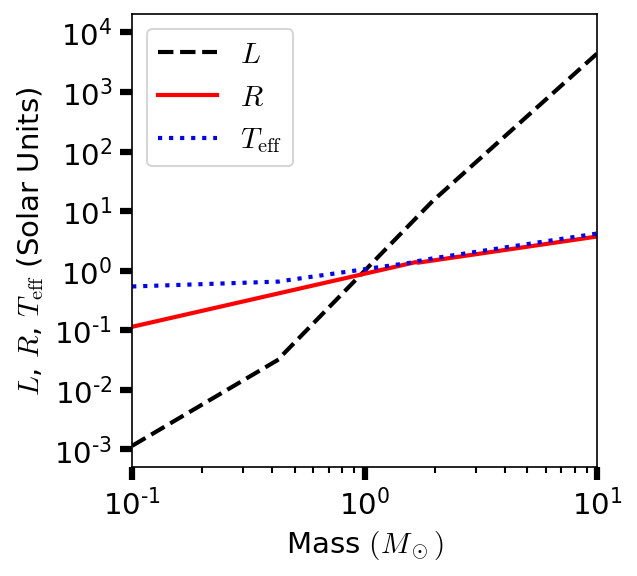

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from myst_nb import glue

#Mass-Luminosity Relations from https://en.wikipedia.org/wiki/Mass%E2%80%93luminosity_relation
def Mass_Luminosity(m_star):
    #Calculate the luminosity based on the stellar mass
    #m_star = stellar mass in M_sun
    L_star = np.zeros(len(m_star))
    low_mass = np.where(m_star<0.43)[0]
    inter_mass = np.where(np.logical_and(m_star>=0.43,m_star<=2))
    hi_mass = np.where(m_star>2)[0]
    L_star[low_mass] = 0.23*m_star[low_mass]**2.3 
    L_star[inter_mass] = m_star[inter_mass]**4
    L_star[hi_mass] = 1.4*m_star[hi_mass]**3.5
    return L_star
#Mass-Radius Relations from Demircan & Kahraman (1991); 1991Ap%26SS.181..313D for ZAMS stars (0.1 M_sun <m_star, 120 M_sun)
def Mass_Radius(m_star):
    #Calculate the radius based on the stellar mass
    #m_star = stellar mass in M_sun
    R_star = np.zeros(len(m_star))
    low_mass = np.where(m_star<1.66)[0]
    hi_mass = np.where(m_star>=1.66)[0]
    R_star[low_mass] = 0.89*m_star[low_mass]**0.89
    R_star[hi_mass] = 1.01*m_star[hi_mass]**0.57
    return R_star

def Temp_eff(m_star):
    #Calculate the effective temperature from the Stefan-Boltzmann Law
    #m_star = stellar mass in M_sun
    L_star = Mass_Luminosity(m_star)
    R_star = Mass_Radius(m_star)
    return (L_star/R_star**2)**0.25

mass_rng = np.logspace(-1,1,201)
lw = 2
fs = 'medium'

fig = plt.figure(figsize=(4,4),dpi=150)
ax = fig.add_subplot(111)

L_rng = Mass_Luminosity(mass_rng)
R_rng = Mass_Radius(mass_rng)
T_rng = Temp_eff(mass_rng)
ax.plot(mass_rng,L_rng,'k--',lw=lw,label='$L$')
ax.plot(mass_rng,R_rng,'r-',lw=lw,label='$R$')
ax.plot(mass_rng,T_rng,'b:',lw=lw,label='$T_{\\rm eff}$')

ax.legend(loc='upper left',fontsize=fs)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(0.0005,2e4)
ax.set_xlim(0.1,10)
ax.set_yticks([0.001,0.01,0.1,1.,10.,100,1000,10000])
ax.set_xlabel("Mass $(M_\odot)$",fontsize=fs)
ax.set_ylabel("$L$, $R$, $T_{\\rm eff}$ (Solar Units)")

ax.minorticks_on()
ax.tick_params(which='major',axis='both', direction='out',length = 6.0, width = 3.0)
ax.tick_params(which='minor',axis='both', direction='out',length = 3.0, width = 1.0)

glue("LRT_fig", fig, display=False);

Stars range in mass from $0.08-120\ M_\odot$, where $M_\odot$ represents a solar mass.  Smaller objects cannot sustain fusion in their cores to balance gravitational contraction, but more massive bodies have a higher luminosity that would blow away their outer layers.  Low-mass stars are much more common than high-mass stars, but high-mass stares can be seen from much farther away (due to their high luminosity).  Overall, the majority of stars visible to the naked eye are more massive than the Sun.

Figure {numref}`{number}<HR Hipparcos>` shows that although stellar luminosities vary by many orders of magnitude, they follow similar processes as a class of objects.  Stars supported against gravitational collapse by thermal pressure that is maintained by fusion reactions in their interiors, even though the only range in mass by $\sim 3$ orders of magnitude.

```{glue:figure} HR_Hipparcos_fig
:figwidth: 600px
:name: "HR Hipparcos"

Hertzsprung-Russell (H-R) diagram for nearby, single stars using the Hipparcos catalog ([Eduardo Martin Calleja](http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html)).  The red points mark stars visible with the naked eye that are within 250 light years of the Solar System.  The cyan point marks the position of the Sun within the H-R diagram.
```

The planets within the Solar System have a broader range of properties. Mercury is a condensed body composed primarily of iron, where Jupiter is a fluid object composed of hydrogen and helium that is almost 4 orders of magnitude more massive than Mercury.  Some extrasolar objects are ten times more massive than Jupiter, which extends the mass range for planets to over six orders of magnitude.

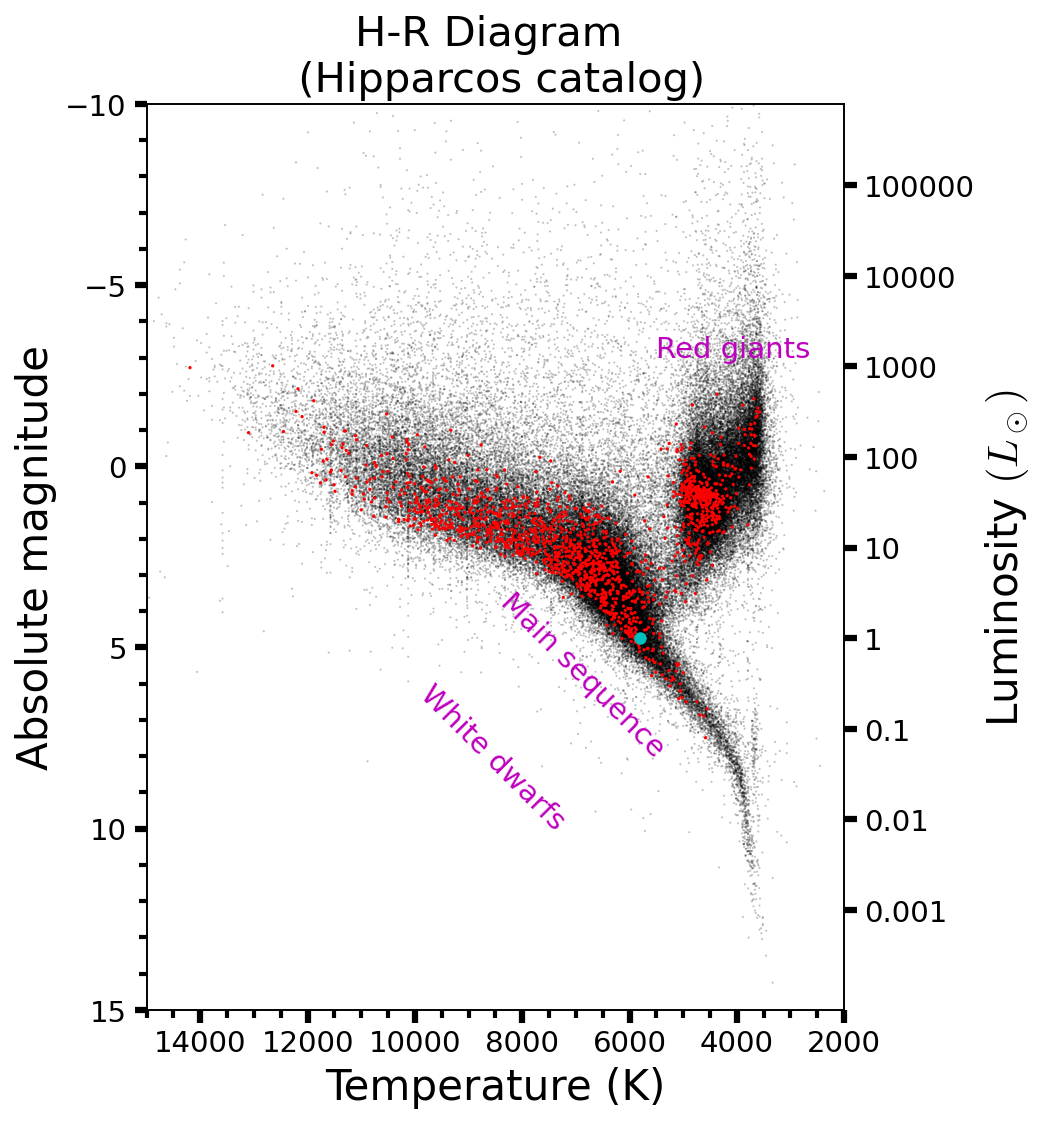

In [37]:
#http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

def T_from_BV(BV):
    #Estimate T from B-V; Ballesteros (2012); https://arxiv.org/abs/1201.1809
    a = 1/(0.92*BV+1.7)
    b = 1/(0.92*BV+0.62)
    return 4600*(a+b)

def L2AbsMag(L):
    #Calculate the absolute Magnitude from the luminosity (in L_sun)
    return 4.742 - 2.5*np.log10(L)

filename = 'I_239_selection.tsv'

df_vals = np.genfromtxt(filename,delimiter=';',comments='#',usecols=(0,1,2,3),filling_values=np.nan) #HIP;Vmag;Plx;B-V;SpType

SpType = np.genfromtxt(filename,delimiter=';',comments='#',usecols=(4),dtype="U8")

#remove rows where B-V or SpType are blank
cut_blanks = np.where(np.logical_and(SpType != '',np.isfinite(df_vals[:,3])))[0]
df_vals = df_vals[cut_blanks]
SpType = SpType[cut_blanks]

#remove rows with a negative trigonometric parallax
cut_negp = np.where(df_vals[:,2]>0)[0]
df_vals = df_vals[cut_negp]
SpType = SpType[cut_negp]

#Convert B-V to T_eff
df_vals[:,3] = T_from_BV(df_vals[:,3])

#---------------------------------#
#Prepare data by spectral type
singles = []
for i in range(0,len(SpType)):
    SpType_i = SpType[i] 
    if (len(SpType_i)>=2) and (SpType_i[0].isalpha() and SpType_i[1].isdigit()):
        if SpType_i[0] in 'OBAFGKM':
            singles.append(i)
df_vals = df_vals[singles]
SpType = SpType[singles]
#---------------------------------#

#cut by parallax (distance) in milliarcseconds
p_max = 1/(250/3.26)/1e-3 #250 ly in mas
cut_distance_near = np.where(np.logical_and(df_vals[:,2]>p_max,df_vals[:,1]<6))[0]

# Create array for the absolute magnitude
M_V = df_vals[:,1] + 5*np.log10(df_vals[:,2]/100.)

fs = 'x-large'

fig = plt.figure(figsize=(6,8),dpi=150)
ax = fig.add_subplot(111)
ax_Lum = ax.twinx()
ax_Lum.set_ylim(15,-10)

L_rng = [0.001,0.01,0.1,1,10,100,1000,10000,100000]
L_ticks = L2AbsMag(L_rng)
Ltick_lbls = [str(x) for x in L_rng]

ax_Lum.set_yticks(L_ticks)
ax_Lum.set_yticklabels(Ltick_lbls)

ax.set_xlim(15000,2000)
ax.set_ylim(15, -10)
#ax.grid()
ax.set_title('H-R Diagram \n (Hipparcos catalog)',fontsize=fs)

ax.title.set_fontsize(20)
ax.set_xlabel('Temperature (K)',fontsize=fs)
ax.set_ylabel('Absolute magnitude',fontsize=fs)
ax_Lum.set_ylabel("Luminosity $(L_\odot)$",fontsize=fs)

ax.scatter(df_vals[:,3], M_V, s=1, edgecolors='none', c='k',alpha=0.25)
ax.scatter(df_vals[cut_distance_near,3],M_V[cut_distance_near],s=2.5,edgecolors='none',c='r')
ax.plot(5800,4.74,'c.',ms=10)

ax.text(10000,10,'White dwarfs',rotation=-45,color='m',zorder=5)
ax.text(8500,8,'Main sequence',rotation=-45,color='m',zorder=5)
ax.text(5500,-3,'Red giants',color='m',zorder=5)

ax_list = [ax,ax_Lum]
for a in ax_list:
    a.minorticks_on()
    a.tick_params(which='major',axis='both', direction='out',length = 6.0, width = 3.0)
    a.tick_params(which='minor',axis='both', direction='out',length = 4.0, width = 2.0)

#ax.tick_params(axis='both', labelsize=14,length=6,width=3)

glue("HR_Hipparcos_fig", fig, display=False);

Figure {numref}`{number}<solar-evolution>` shows the Sun's evolutionary track in the temperature-luminosity plane as it ages.  A star's luminosity grows slowly during the star's main sequence phase because fusion increases the mean particle mass in the core and a greater temperature is required to maintain hydrostatic equilibrium.  When the supply of hydrogen can no longer sustain the fusion reaction, the core shrinks.  

```{figure-md} solar-evolution
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Evolution_of_the_Sun_2_EN.svg" alt="solar evolution"  width="600px">

Evolution of solar-mass star on H-R diagram from pre-MS phase to the end of fusion. Image credit: Wikimedia by user [Szczureq](https://commons.wikimedia.org/wiki/File:Evolution_of_the_Sun_2_EN.svg).
```

Then, hydrogen burning occurs in a shell of material that surrounds a helium-rich core. The star's luminosity increases significantly and turns into a **red giant** because its outer layers swell and *cool*.  If $M_\star \gtrsim 0.6\ M_\odot$, then the core gets hot and dense enough for helium to fuse into carbon and oxygen.  A helium-burning equilibrium that is analogous to the main sequence exists, but it requires a hotter internal temperature.  As a result, the lifetime of helium-burning is much shorter (due to an increased reaction rate), and the star is more luminous during this period (due to more thermal pressure that balances the gravity in the star's denser core).

Electrons (and all other half-integer spin particles) must obey the **Pauli exclusion principle**, which prevents such particles from occupying the same quantum state simultaneously (i.e., two electrons can't have 4 identical quantum numbers in an atom).  Two particles (of any spin) with identical quantum numbers are considered **degenerate** as they are non-unique and can experience a repulsive pressure.  In solar mass stars, electron degeneracy pressure prevents the star from attaining the temperatures necessary for fusion to produce elements more massive than carbon or oxygen.  These stars evolve into **white dwarfs**, which are the remnants of small- and medium-mass stars in which electron degeneracy pressure provides support against gravitational collapse.

But in very massive stars ($M_\star \gtrsim 8\ M_\odot$), fusion continues building more complex atoms until iron (the most stable nucleus) is produced in the core.  No energy can be liberated by nuclear fusion beyond iron, which means that the star's core doesn't have sufficient pressure to balance the gravity.  The core collapse and rapidly releases and immense amount of gravitational energy.  This energy can fuel a **supernova** explosion, which frees some the heavy elements produced by the star to be incorporated in the next generation of stars that form from a molecular cloud.  Neutron stars and black-holes are the remnants of a supernova explosion.  Stellar mass objects, such as white dwarfs and neutron stars, that have exhausted their nuclear fuel are properly referred to as stellar remnants rather than stars.

Although proton-proton fusion does not occur in the cores of giant planets or brown dwarfs, they can still radiate energy due to gravitational contraction.  These objects shrink (and after some initial warming) cool as they age, where there is not a unique relationship between their luminosity and mass.

### Stellar Size
Nuclear reactions maintain the temperature in the cores of low-mass stars close to $T_{\rm nuc} \approx 3 \times 10^6\ {\rm K}$ because the fusion rate is roughly proportional to $T^{10}$ (near $T= T_{\rm nuc}$).  The virial theorem (Eqn. {eq}`virial_theorem`) can be used to show the radii of such stars must be roughly proportional to mass.  The virial theorem is applicable because most of the energy outside the core resides balancing in pressure and gravity.  In equilibrium, the thermal energy and the gravitational potential energy are in balance:

\begin{align}
\frac{GM_\star^2}{R_\star} &\sim \frac{M_\star kT_{\rm nuc}}{m_u}, \\[5pt]
M_\star &\approx \frac{R_\star kT_{\rm nuc}}{Gm_u}, \\[5pt]
M_\star &\propto R_\star.
\end{align}

More-massive stars are larger than low-mass stars (i.e., $M_\star \propto R_\star$), and they are able to radiate more energy due to their hotter temperature (relative to low-mass stars).

At low densities, the hydrostatic structure of a star is determined primarily through a balance of gravity and thermal pressure, where at high densities the electron degeneracy pressure becomes important.  The degeneracy pressure scales as $\rho^{5/3}$ and is comparable in magnitude to (or larger than) the ideal gas pressure, which scales as $\rho T$.  The degeneracy pressure dominates when $\rho \gtrsim 100\ {\rm g/cm^3}$.

Degeneracy pressure dominates over thermal pressure in cool brown dwarfs, neutron stars, and white dwarfs.  In these objects, the degeneracy pressure provides the primary upward force (buoyancy) to balance the downward pull of gravity.  Bodies supported primarily by degeneracy pressure (e.g., neutron stars and white dwarfs) are called **compact objects**.  In compact objects, the virial theorem implies that hte energy of the degenerate particles is comparable to the gravitational potential energy:

```{math}
:label: compact_MR
\rho^{5/3}R^3 &\sim \frac{GM^2}{R}, \\[5pt]
\left(\frac{M}{R^3}\right)^{5/3}R^3 &\sim \frac{GM^2}{R}, \\[5pt]
R &\propto M^{-1/3}.
```

Notice from Eqn. {eq}`compact_MR` that $R$ decreases with increased mass (i.e., it shrinks when mass is added!).  The most massive cool brown dwarfs are indeed expected to have slightly smaller radii than their lower mass brethren.  Young brown dwarfs can be hot and swollen depending on their age and formation circumstances.

## Sizes and Densities of Massive Planets
For bodies of planetary mass, the pressure from the electromagnetic repulsion of electrons (i.e., **Coulomb pressure**) plays a larger role relative to the (quantum) degeneracy pressure.  Coulomb pressure is characterized by constant density, which implies that the radius scales as:

\begin{align}
R \propto M^{1/3}.
\end{align}

The combination of Coulomb and degeneracy pressure results in Jupiter-like radii for all cool brown dwarfs, giant planets (of solar composition), and the very lowest mass stars.  The largest size cool planet are expected to have $M_p \approx 4\ M_{\rm Jup}$.

Fluid bodies can be described through an equation of state, such as a **polytrope** of the form:

\begin{align}
P = K\rho^{(n+1)/n},
\end{align}

which depends on the **polytropic constant** $K$ and the **polytropic index** $n$ (see here for [more details](https://saturnaxis.github.io/ModernAstro/Chapter_11/interiors-of-stars.html#polytropic-models-and-the-lane-emden-equation)).

**Consider an equation of state with $n=1$, where $P = K\rho^2$.**  This represents a sphere of cool pure hydrogen gas, and the radius is independent of mass because:

\begin{align*}
\frac{dP}{dR} &= - \frac{GM\rho}{R},\\
&= 2K\rho\frac{-3M}{R^4},\\
R &= \left(\frac{6K}{G}\right)^{1/4}.
\end{align*}

When more mass that is added to this body, the material gets compressed such that its radius does not change.  With $n=1$, the hydrodynamic equations can be solved analytically, where the results are in good agreement with calculations based on more detailed pressure-density relations.  Integration of the hydrostatic equilibrium (Eqn. {eq}`gen_hydro_eq`) leads to the following density profile:

\begin{align}
\rho = \rho_c \left(\frac{\sin\ C_Kr}{C_Kr}\right),
\end{align}

with the density at the center fo the body $\rho_c$ and 

\begin{align}
C_K = \sqrt{\frac{2\pi G}{K}}.
\end{align}

The radius $R$ of the body is defined by the surface ($\rho = 0$), which implies the non-trivial solution $\sin\ C_KR = 0$, or $R= \pi/C_K$.  Given a polytropic constant $K = 2.7 \times 10^5\ {\rm m^5/kg/s^2}$ (obtained from a more precise equation of state), we find that the planet's radius $R = 7.97\times 10^4\ {\rm km}$.  The radius of this hydrogen sphere is slightly larger than Jupiter's mean radius ($R_{\rm Jup} = 6.99 \times 10^4\ {\rm km}$), and significantly larger than Saturn's mean radius ($R_{\rm Sat} = 0.833\ R_{\rm Jup}$).  This suggest that the Solar System's two largest planets are composed primarily (but not entirely) of hydrogen.

Using experimental data at low pressure and theoretical models at very high pressure, it can be shown that the maximum radius for cold self-gravitating spheres is approximately

\begin{align}
R_{\rm max} \approx \frac{Z \times 10^5}{\mu m_u \sqrt{Z^{2/3}+0.51}}\ {\rm km}, 
\end{align}

using the atomic number $Z$ and the atomic mass $\mu m_u$ based on the planet's composition.  This equation results in $R_{\rm max} \approx 82,600\ {\rm km}$ for a cool pure hydrogen planet and $R_{\rm max} \approx 35,000\ {\rm km}$ for pure helium.  

The observed atmospheric species form a boundary condition on the choice of elements to include in models of the interior structure of the giant planets.  The atmospheric composition of Jupiter and Saturn is close to a solar composition.


## Nucleosynthesis
The nucleus of a hydrogen atom $^1_1{\rm H}$ consists of a single proton.  All other elements (including heavier isotopes of hydrogen) include both types of **nucleons** (i.e., protons and neutrons) in their nucleus.  The atomic nucleus is held together by the **strong nuclear force** that overcomes the Coulomb repulsion of protons.  The combined mass of a nucleus is *less than* the sum of the individual nucleons.  The missing mass $\Delta M$ has been converted to energy $\Delta E$ (known as the **binding energy** of the nucleus), according to Einstein's formula $\Delta E = \Delta M c^2$.

```{figure-md} nuclear-binding-energy
<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Binding_energy_curve_-_common_isotopes.svg" alt="binding energy"  width="600px">

Binding energy curve (average binding energy per nucleon in MeV against number of nucleons in nucleus) for a number of relatively common (abundant) isotopes. A few important ones for the purposes of nuclear fusion and nuclear fission are marked, as well as iron-56, which sits at the highest point on this graph and cannot yield energy from fusion or fission. Image credit: Wikimedia Commons by user [Fastfission](https://commons.wikimedia.org/wiki/File:Binding_energy_curve_-_common_isotopes.svg).
```

A higher value of the binding energy per nucleon means that the nucleus is more tightly bound.  Figure {numref}`{number}<nuclear-binding-energy>` shows the binding energies per nucleon of many nuclides.  Fusion of light elements typically releases energy, but the fusion process requires the atomic nuclei to be very close so that the strong nuclear force can dominate over the repulsive Coulomb potential, or **Coulomb barrier** (see Fig. {numref}`{number}<nuclear-potential>`).

```{figure-md} nuclear-potential
<img src="nuclear_potential.png" alt="nuclear potential"  width="600px">

The repulsive Coulomb potential is a barrier against charged particles entering the attractive nuclear potential.  The strong nuclear potential is only effective over short distances ($10^{-15}\ {\rm m} = 1\ {\rm fm}$).
```

The formation of atomic nuclei is called **nucleosynthesis**, which primarily occurs in stellar environments.  Models of nucleosynthesis yield clues about the history of the material that was eventually incorporated into our Solar System by using observational data from meteorites and other bodies.  Two important environments for nucleosynthesis are the very early Universe (i.e., primordial) and the interiors of stars.  Other environments are responsible for some isotopes, such as **spallation** and radioactive decay.  Spallation is the collision between high-energy nuclei (from a supernova explosion) with the ambient interstellar hydrogen, which causes the splintering of portions of the heavy nuclei.

```{glue:figure} SS_abundance_fig
:figwidth: 800px
:name: "Solar System abundances"

Estimated abundances of the chemical elements in the Solar System by atomic number $Z$. Hydrogen $(\rm H)$ and helium $(\rm He)$ are the most abundant from the Big Bang. The next three elements (lithium $(\rm Li)$, beryllium $(\rm Be)$, and boron $(\rm B)$) are rare because they are poorly synthesized in the Big Bang and also in stars.  See Table {numref}`{number}<element_abund_SS>` for values and elemental names as a function of $Z$.
```

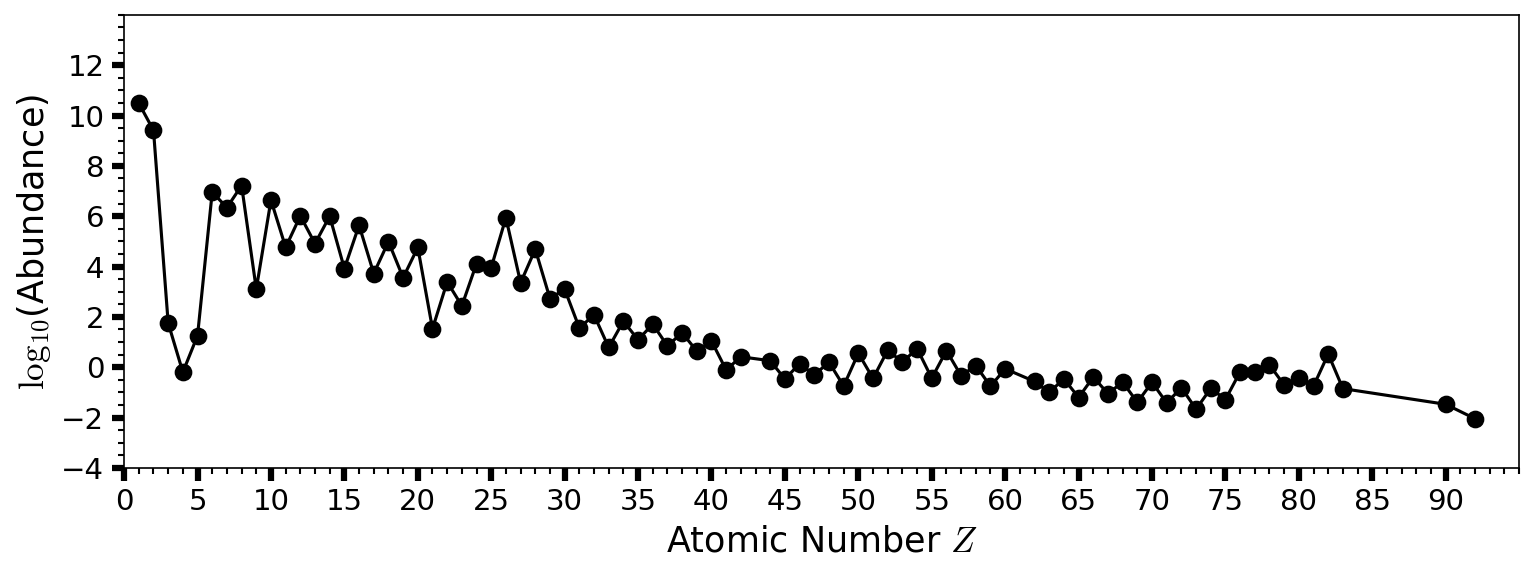

In [34]:
#Using data from  Lodders, K. 2020, Solar Elemental Abundances, in The Oxford Research Encyclopedia of Planetary Science, Oxford University Press
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

data_val = np.genfromtxt("Solar_System_Abundances_Lodders_Table_8.csv",delimiter=',',comments='#',usecols=(0,2,3))
data_el = np.genfromtxt("Solar_System_Abundances_Lodders_Table_8.csv",delimiter=',',comments='#',usecols=(1),dtype='U8')

#remove rows with nan
data_val = np.delete(data_val,np.array([42,60]),0)
#set uncertainty for H to one; log_10 1 = 0
data_val[0,2] = 1

fs = 'large'

fig = plt.figure(figsize=(12,4),dpi=150)
ax = fig.add_subplot(111)

ax.plot(data_val[:,0],np.log10(data_val[:,1]),'k.-',lw=1.5,ms=15)
#ax.errorbar(data_val[:,0],np.log10(data_val[:,1]),np.log10(data_val[:,2]),fmt='o',color='k',ms=5,capsize=10)

ax.set_xlabel("Atomic Number $Z$",fontsize=fs)
ax.set_ylabel("$\log_{10}$(Abundance)",fontsize=fs)

ax.set_ylim(-4,14)
ax.set_xlim(0,95)

ax.set_yticks(np.arange(-4,14,2))
ax.set_xticks(np.arange(0,95,5))

ax.minorticks_on()
ax.tick_params(which='major',axis='both', direction='out',length = 6.0, width = 3.0)
ax.tick_params(which='minor',axis='both', direction='out',length = 3.0, width = 1.0)

glue("SS_abundance_fig", fig, display=False);


### Primordial Nucleosynthesis
Current evidence suggests that the Universe began in an extremely energetic **hot big bang** roughly 13.7 billion years ago (Gyr, or Ga).  Evidence for an initial explosion of matter to create the cosmos exists primarily in the observed expansion of groups of galaxies away from each other and the pervasive background static that can be measured at radio wavelengths.  The background static is produced over a range of wavelengths like a blackbody with a temperature of $2.7\ {\rm K}$.  This cosmic static is believed to be the red-shifted remains of initial explosion after the Universe cooled enough to be transparent to light. 

```{note}
Although the term *big bang* is ubiquitous today to describe the best evidence for the beginning of the Universe.  It was originally coined by [Fred Hoyle](https://www.popsci.com/big-bang-term-origin-fred-hoyle/) as insult for a new theories in the 1950s that challenged the *steady-state* theory of the Universe.
```

The very young Universe was filled with mostly protons $p^+$ (i.e., hydrogen nuclei) and neutrons $n$.  Free neutrons are unstable, where a neutron will decay via the reaction:

\begin{align}
n \rightarrow p^+ + e^- + \overline{\nu}_e,
\end{align}

into a proton, electron $e^-$ and an (electron) antinuetrino $\overline{\nu}_e$.  This process is characterized statistically by the time required for half of a sample to decay, or its **half-life** $\tau_{1/2}$.  The half-life $\tau_{1/2}$ of a free neutron is only 10.3 minutes.  

Protons and neutrons collided and sometimes fused together to form deuterium $(^2_1{\rm H})$ nuclei.  During the first few minutes after the big bang, the cosmic background radiation field was so energetic that the deuterium nuclei where photodissociated (i.e., broken apart by photons) very soon after they formed.  After about three minutes, the temperature cooled enough for deuterium to merge with protons, neutrons, and other deuterium nuclei.  

Within the next few minutes, about one-fourth of the nucleons in the Universe combined into alpha particles $(^4_2{\rm He})$.  Most of the baryonic matter (i.e., nucleons) remained as protons, with a small amount forming deuterium, light helium $(^3_2{\rm He})$, and tritium $^3_1{\rm H}$.  There was also a very small but astrophysically significant amounts of lithium, beryllium, and boron with very minute amounts of heavier elements.

```{note}
Tritium decays into light helium (i.e., helium-3) with a half-life of 12 years.
```
Big bang nucleosynthesis did not proceed much beyond helium because the density of the Universe was too small for fusion to form heavier nuclei due to the cooling time required to form the first helium nuclei.  After about 700,000 years after the big bang, the blackbody radiation had cooled sufficiently for electrons to join with protons to form the first atoms (i.e., hydrogen).

### Stellar Nucleosynthesis
Most nuclei heavier than boron were produced in stellar interiors.  Main sequence stars (e.g., the Sun) convert matter into energy via nuclear reactions that ultimately transform hydrogen nuclei into alpha particles.  In normal stars, hydrodynamic equilibrium prevents them from collapsing further.  Protostars and young stars, contract as they radiate away their thermal energy, where this contraction leads to an increase in pressure and density in the stellar core.  Contraction continues until the core becomes hot enough to generate energy from **thermonuclear fusion**.

The reaction rate for fusion increases steeply with temperature because only a tiny minority of the nuclei possess enough kinetic energy to (quantum-mechanically) tunnel through the Coulomb barrier with a finite probability.  Equilibrium can be maintained (e.g., a thermostat) in the core by two competing processes: 

- If the fusion proceeds too rapidly, then the core expands and cools.
- If not enough energy is supplied by fusion, then the core shrinks and heats up. 
  
Deuterium fusion requires a *lower* temperature than proton-proton fusion, which allows it to occur first until the star rapidly depletes its supply of (available) deuterium.  A significant amount of deuterium can remain in the outer (cooler) stellar atmosphere, if it is not convectively mixed with the lower (hot) regions.  The cores of very low mass objects (e.g., brown dwarfs) get so dense that they are stopped from collapse by degenerate electron pressure before they reach the temperature necessary for fusion to occur at a significant rate.

#### Element Production During Nuclear Fusion 

In main sequence stars $(M_\star \lesssim 1\ M_\odot)$, the primary reaction sequence is the proton-proton chain (or **pp-chain**).  The principal branch of the pp-chain occurs in three steps:

\begin{align}\
{^1_1{\rm H}} + {^1_1{\rm H}} &\rightarrow {^2_1{\rm He}} + e^+ + \nu_e, \qquad &\text{(reaction Ia)} \\[5pt]
{^2_1{\rm H}} + {^1_1{\rm H}} &\rightarrow {^3_2{\rm He}} + \gamma, \qquad &\text{(reaction Ib)} \\[5pt]
{^3_2{\rm He}} + {^3_2{\rm He}} &\rightarrow {^4_2{\rm He}} + 2\ {^1_1{\rm H}} + 2\gamma, \qquad &\text{(reaction Ic)} 
\end{align}

which produces a **positron** $e^+$ (i.e., an electron with a positive charge), an (electron) neutrino $nu_e$, and a photon $\gamma$.  Reactions Ia and Ib have to occur twice to produce the necessary helium-3 nuclei for reaction Ic.  The reaction rate for the pp-chain becomes significant near $T_{\rm nuc} = 3 \times 10^6\ {\rm K}$.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/vCD3ca_W8z8" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

At temperatures close to the Sun's core ($T \approx 15 \times 10^6\ {\rm K}$), the fusion rate is roughly proportional to $T^4$, which isn't as sensitive to temperature changes as the $T^{10}$ dependence near $T_{\rm nuc}$ and the solar cor still varies steeply with temperature.  The steep temperature dependence implies that fusion acts as an effective thermostat.  It also implies that more massive main sequence stars only require a slightly higher core temperature to generate a substantially higher luminosity.

In main sequence stars $(M_\star > M_\odot)$, the core temperature is somewhat higher, which allows for the **CNO cycle** to dominate.  The pp-chain is capable of producing $^4_2{\rm He}$, but the CNO cycle needs carbon to start the reaction.  No nuclide with atomic mass 5 or 8 is stable, so to produce carbon from helium requires two fusions in *immediate* succession:

\begin{align}
{^{4}_2{\rm He}} + {^{4}_2{\rm He}} &\leftrightarrow {^{8}_4{\rm Be}},\\[5pt]
{^{8}_4{\rm Be}} + {^{4}_2{\rm He}} &\rightarrow {^{12}_6{\rm C}} + \gamma.
\end{align}

This is called the **triple alpha process** and it requires much higher densities than the pp-chain and CNO cycle.  The half-life of the beryllium-8 is only $2\times 10^{-16}\ {\rm s}$, which is why it has the double arrow for its reaction and justifies the immediate succession.  It also explains why such high densities are required.

The CNO cycle has two branches, where the first branch is:

\begin{align}
{^{12}_6{\rm C}} + {^{1}_1{\rm H}} &\rightarrow {^{13}_7{\rm N}} + \gamma, \\[5pt]
{^{13}_7{\rm N}} &\rightarrow {^{13}_6{\rm C}} + e^+ + \nu_e, \\[5pt]
{^{13}_6{\rm C}} +{^{1}_1{\rm H}} &\rightarrow {^{14}_7{\rm N}} + \gamma, \\[5pt]
{^{14}_7{\rm N}} +{^{1}_1{\rm H}} &\rightarrow {^{15}_8{\rm O}} + \gamma, \\[5pt]
{^{15}_8{\rm O}} &\rightarrow {^{15}_7{\rm N}} + e^+ + \nu_e, \\[5pt]
{^{15}_7{\rm N}} +{^{1}_1{\rm H}} &\rightarrow {^{12}_6{\rm C}} + {^{4}_2{\rm He}}.
\end{align}

Nitrogen-13 and oxygen-15 have a half-life to decay of $10\ {\rm min}$ and $2\ {\rm min}$, respectively.  Although the half-lives are given, the timescales for the four fusion reactions within the CNO cycle depend on the temperature and the abundances (densities) of the nuclei involved.  The first branch occurs *99.96%* of the time, where additional details concerning the second branch of the CNO cycle can be found [here](https://saturnaxis.github.io/ModernAstro/Chapter_11/interiors-of-stars.html#the-cno-cycle).

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/CH_uP8cCDM0" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

Helium fusion occurs when a sufficiently massive star $(M_\star \gtrsim 0.25\ M_\odot)$ has exhausted the available supply of hydrogen in its core.  The thermostat that maintains hydrostatic equilibrium during the star's main sequence phase is no longer active.  But, hydrogen fusion can occur in a shell surrounding the hydrogen-depleted core.  The total stellar energy production greatly exceeds that during the star's main sequence phase, which causes the star's outer layers to expand (due to increased thermal pressure) and cool.  At this stage, the star becomes a **red giant**.

Nuclear growth beyond carbon does not require two reactions in immediate succession (i.e., the triple alpha process), and thus could occur in a lower density environment.  However, the increased Coulomb barrier implies that an even higher temperature (and larger stellar masses) are required
.  Growth can occur by successive addition of alpha particles:

\begin{align}
{^{12}_6{\rm C}} + {^{4}_2{\rm He}} &\rightarrow {^{16}_8{\rm O}} + \gamma, \\[5pt]
{^{16}_8{\rm O}} + {^{4}_2{\rm He}} &\rightarrow {^{20}_{20}{\rm Ne}} + \gamma, \\[5pt]
{^{20}_{10}{\rm Ne}} + {^{4}_2{\rm He}} &\rightarrow {^{24}_{12}{\rm Mg}} + \gamma, 
\end{align}

or at somewhat higher temperatures by reactions such as

\begin{align}
{^{12}_6{\rm C}} + {^{12}_6{\rm C}} &\rightarrow {^{24}_{12}{\rm Mg}} + \gamma.
\end{align}

The most stable nucleus is iron-56 $(^{56}_{23}{\rm Fe})$, where fusion up to $\sim 23$ protons and neutrons can release energy.  Fusion of alpha particles (helium-4 nuclei) into heavier nuclei requires higher temperatures.  Nuclei composed of $3-20$ alpha particles are quite stable and easy to produce, which makes them relatively abundant.  Heavy elements with even atomic numbers tend to be more abundant than odd-numbered elements (see Fig. {numref}`{number}<Solar System abundances>`).  The proton and neutron numbers of all stable nuclides are shown in Fig. {numref}`{number}<stable-nuclides>`.

```{glue:figure} stable_nuclides_fig
:figwidth: 600px
:name: "stable-nuclides"

Distribution of stable nuclei, plotted as atomic number versus number of neutrons.  Adapted from script on [scipython.com](https://scipython.com/blog/plotting-nuclide-halflives/); data taken from the [Japan Atomic Energy Agency](https://wwwndc.jaea.go.jp/NuC/index_J.html).
```

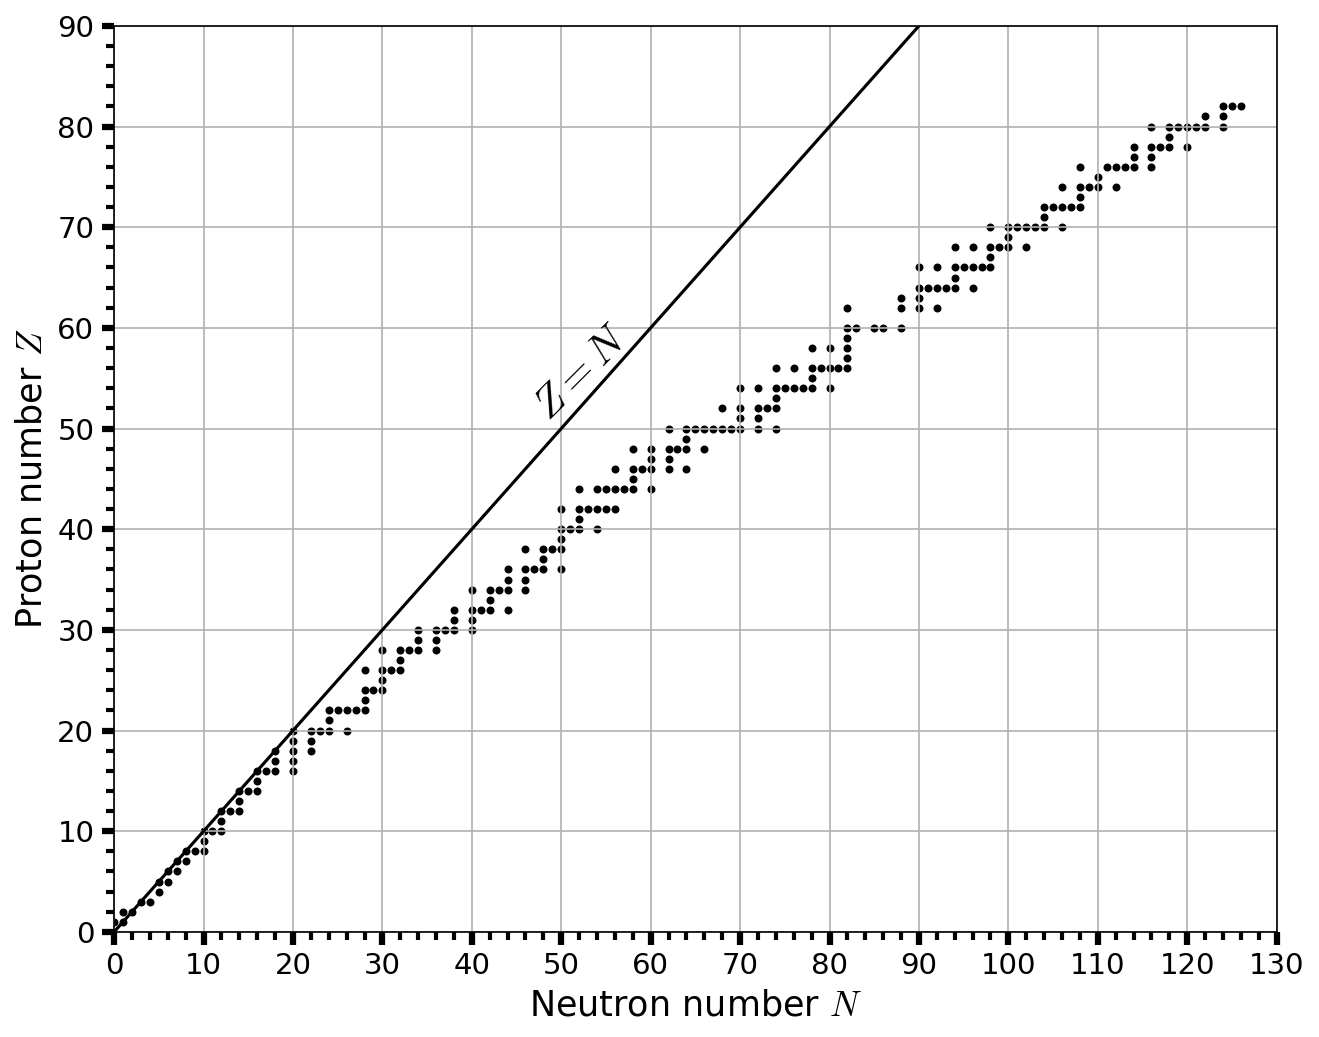

In [5]:
#code from https://scipython.com/blog/plotting-nuclide-halflives/ 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

element_symbols = ['H', 'He', 'Li', 'Be',  'B',  'C',  'N',  'O',  'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',  'P',  'S', 'Cl', 'Ar',  'K', 'Ca', 'Sc', 'Ti',  'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr',  'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te',  'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',  'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa',  'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']

# Read in the data, determining the nuclide half-lives as a function of the
# number of neutrons, N, and protons, Z. Stable nuclides are indicated with
# -1 in the half-life field: deal with these separately from the radioactive
# nuclei.
halflives = {}
stables = []
for line in open('halflives.txt'):
    line = line.rstrip()
    halflife = line[10:]
    if halflife == 'None':
        continue
    fields = line[:10].split('-')
    symbol = fields[0]
    A = int(fields[1].split()[0])
    Z = int(element_symbols.index(symbol)) + 1
    N = A - Z
    halflife = float(halflife)
    if halflife < 0:
        stables.append((N, Z))
    else:
        halflives[(N, Z)] = halflife

# Unwrap the halflives dictionary into sequences of N, Z, thalf; take the log.
k, thalf = zip(*halflives.items())
N, Z = zip(*k)
maxN, maxZ = 130, 90
fs='large'

# Set up the figure: one Axes object for the plot, another for the colorbar.
fig = plt.figure(figsize=(10,8),dpi=150)
ax = fig.add_subplot(111)

# Stable nuclides are plotted in black ('k').
Nstable, Zstable = zip(*stables)
sc2 = ax.scatter(Nstable,Zstable, c='k', s=8, label='stable')
ax.plot(range(0,130),range(0,130),'k-',lw=1.5)
ax.text(46,51,"$Z=N$",rotation=45,fontsize='x-large')

ax.set_xlim(0, maxN)
ax.set_ylim(0, maxZ)
ax.set_ylabel(r'Proton number $Z$',fontsize=fs)
ax.set_xlabel(r'Neutron number $N$',fontsize=fs)
ax.set_xticks(np.arange(0,140,10))
ax.grid()

ax.minorticks_on()
ax.tick_params(which='major',axis='both', direction='out',length = 6.0, width = 3.0)
ax.tick_params(which='minor',axis='both', direction='out',length = 4.0, width = 2.0)

glue("stable_nuclides_fig", fig, display=False);



#### Production of Other Elements: $s$, $r$, and $p$ Processes
The deep interiors of star undergoing fusion reactions are dense fluids of protons, neutrons, electrons, an d heavier nuclei.  In addition to direct fusion reactions, the capture of protons and neutrons by nuclei can build up the atomic mass in ways distinct from the main fusion reaction sequences.  Neutron capture is more likely than proton capture, because electrostatic repulsion does not have to be overcome.  The production of magnesium-25 and oxygen-16 both liberate neutrons and are thought to be their primary sources.

The mix of nuclides produced by neutron addition depends on the flux of neutrons.  When the time between between successive neutron absorptions is long enough for most unstable nuclei to decay, the mixture of nuclides produced lies deep within the [valley of nuclear stability](https://en.wikipedia.org/wiki/Valley_of_stability), where the mixture of neutrons and protons leads to the greatest binding energy for a nucleus.

The process of neutron capture in a stable stellar interior is the $\boldsymbol s$ (or slow) **process**.  The $s$ process bears its name from the long timescale between successive capture of neutrons by a nucleus, which can range from $10-10^5$ years.  From Fig. {numref}`{number}<stable-nuclides>` a horizontal movement changes the neutron number $N$, but does not change the proton (or atomic) number $Z$.  *Atomic isotopes* are variations of an element with a different neutron number, but not every increase in neutron number results in a stable atom.  Unstable isotopes can go through $\boldsymbol \beta$ **decay** by converting a neutron into a proton, which increases the atomic number and makes a new element.  *After the main-sequence stars swell into giants, where the processes of fusion at this stage might be responsible for $s$-element production.* 

Some neutron-rich isotopes require that neutron capture proceed quite rapidly, where the rapid addition of neutrons is called an $\boldsymbol r$ **process**.  Here, neutron capture is rapid enough that very neutron-rich nuclei are produced until the net capture rate is no longer competitive with $\beta$ decay, and a cascade of $\beta$ decays increases the atomic number (and decreases the neutron number) until a stable nuclide is reached.  *Neutron-rich environments within rapidly expanding envelopes of supernova, the winds of neutron stars, or the mergers of neutron stars with other compact objects have been invoked as possible sites for the production of elements by the $r$ process.*  Uranium and other very heavy naturally occurring elements are produced via $r$ process nucleosynthesis.

Some 35 (out of the hundreds of stable nuclides) are proton rich and shielded from the $s$ and $r$ process production by other stable nuclides.  for some time, it was thought that a $\boldsymbol p$ **process** exists that must involve the addition of protons.  The addition of protons to a nucleus requires high temperatures to overcome the Coulomb barrier, which is reminiscent of nuclear fusion.

An alternative mechanism that enriches protons in a nucleus is the removal of neutrons.  To make the $p$ process nuclides, the removal would have to occur from *stable* nuclides, where $\beta$ decay does not operate.  The suggested possible mechanisms for the $p$ process elements are:

- exposing nuclides to very high temperatures for short periods of time.  Neutrons will "drip" off of the nuclides first, followed by protons.  If the process is truncated at the right time, the net result is relatively proton-rich nuclides.
- the interiors of supernovae, where the supernova shock itself provides a short high-temperature burst. At least two different kinds of supernovae appear to be required to produce the right mix of the $p$ process nuclides.

It is clear that more research is required to fully understand nucleosynthesis via the $p$ process.

### Radioactive decay
Many naturally occurring nuclides are **radioactive**, which means they spontaneously decay into nuclides of lower-mass elements or other isotopes of the same element.  [Radioactive decay](https://en.wikipedia.org/wiki/Radioactive_decay) rates can be accurately measured, which allows scientists to use them as precise clocks to reconstruct the history of many rocks.  Every radioactive decay process releases energy, and the resultant heating can lead to differentiation of planetary bodies.

The most common types of radioactive decay are: $\alpha$ decay and $\beta$ decay, where the various types of decay are summarized in Fig. {numref}`{number}<radioactive-decay>`.

```{figure-md} radioactive-decay
<img src="https://openstax.org/apps/archive/20220509.174553/resources/e619c0e4c53e025c3bedd141d394dec385b7daf6" alt="radioactive decay"  width="600px">

This table summarizes the type, nuclear equation, representation, and any changes in the mass or atomic numbers for various types of decay.  Image Credit: Openstax:[Chemistry](https://openstax.org/books/chemistry-2e/pages/21-3-radioactive-decay).
```

When an atomic nucleus undergoes [$\beta$ decay](https://en.wikipedia.org/wiki/Beta_decay) a neutron is converted into a proton, so the atomic number is increased by one and the neutron number decreases by one.  In this process, the actual mass of the nucleus decreases very slightly due to a change in the amount of binding energy required.  Proton-rich nuclei can undergo inverse $\beta$ decay, where the atomic number is decreased by one.  A closely related process is **electron capture**, whereby an atom's inner electron is captured by the nucleus to convert proton into a neutron.  Two example reactions are:

\begin{align*}
{^{14}_{6}{\rm C}} &\rightarrow {^{14}_{7}{\rm N}} + e^- + \overline{\nu}_e, \qquad & \text{(}\beta^-\ \text{decay)} \\[5pt]
{^{23}_{12}{\rm Mg}} &\rightarrow {^{23}_{11}{\rm Na}} + e^+ + \nu_e, \qquad & \text{(}\beta^+\ \text{decay)},
\end{align*}

where they differ in types of charge (electron or positron) and lepton number (electron [neutrino](https://en.wikipedia.org/wiki/Neutrino) or antineutrino) conservation.

When a nucleus undergoes [$\alpha$ decay](https://en.wikipedia.org/wiki/Alpha_decay), its atomic number decreases by two and its atomic mass decreases by four (i.e., it releases a helium-4 nucleus).  An example of $\alpha$ decay is the transformation of uranium to thorium by:

\begin{align}
{^{238}_{92}{\rm U}} \rightarrow {^{234}_{90}{\rm Th}} + {^{4}_2{\rm He}} + 2\gamma.
\end{align}

Some heavy nuclei decay via **spontaneous fission**, which produces at least two nuclei more massive than helium.  Spontaneous fission is an alternative decay mode for uranium-238 (and of plutonium-244) leading to xenon and lighter byproducts.

### Element Production and Life
It is particularly intriguing to examine the elemental abundances and notice that the fundamental building blocks of life (e.g. carbon, hydrogen, nitrogen, and oxygen) are quite abundant relative to most other elements.  Hydrogen is the most abundant, but these other elements are abundant because they are the direct products of fusion reactions powering stars.

The high abundances of silicon and iron-group elements have planetary implications, where silicon is the last of the source materials for main fusion reactions.  The products of the last main fusion reactions include iron and elements close to in within the periodic table.  These elements of moderate atomic weight are the basic building blocks of Earth and its sister terrestrial planets.

The night sky on a moonless night (far from city lights) shows the alpha and omega of element production through the multitude of stars.  Young stars just beginning their conversion of hydrogen to helium by fusion, and the red giant going through its terminal stages of fusion before the final neutron production of heavy elements.  The sky houses the cosmic factories making the elements that might become part of some strange biology on a to-be-formed world.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/tLPkpBN6bEI" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

## **Homework**

```{admonition} Problem 1
Use the equation of hydrostatic equilibrium to estimate the pressure at the center of the Moon, Earth and Jupiter.

**(a)** Take the simplest approach, approximating the planet to consist of one slab of material with thickness $R$, the planetary radius. Assume the gravity $g_p(r) = g_p(R)$ and use the mean density $\rho(r) = \rho$.

**(b)** Assume the density of each planet to be constant throughout its interior and derive an expression for the pressure in a planet's interior
as a function of distance r from the center. *Hint: You should get Eqn. {eq}`central_press`.*

**(c)**  Although the pressure obtained in (a) and (b) is not quite right, it will give you a fair estimate of its magnitude. Compare your answer with the more sophisticated estimates given in Table {numref}`{number}<planet_prop_table>` and comment on your results.
```

```{admonition} Problem 2
Table {numref}`{number}<element_abund_SS>` gives the relative cosmic abundances of the elements. Use the plot of binding energy per nucleon (Fig. {numref}`{number}<nuclear-binding-energy>`) plus the astrophysics of nucleosynthesis to briefly explain the reasons that:

**(a)** $\rm H$ is the most abundant element, and $\rm He$ is the second most abundant element.

**(b)** $\rm C$ and $\rm O$ are far more abundant than are $\rm Li$, $\rm Be$ and $\rm B$.

**(c)** $\rm Fe$ is more abundant (by mass) than any other element heavier than $\rm O$.

**(d)** Elemental abundances drop precipitously with increasing atomic number above 26 (the atomic number of iron).

**(e)** Apart from $\rm H$, elements with odd atomic number are generally less abundant than neighboring elements of even atomic numbers.

```

```{admonition} Problem 3
Summarize Kepler's laws of planetary motion.  How are these laws important for astrobiologists?

```

```{admonition} Problem 4
Hydrostatic equilibrium is an important concept for both astrophysicists and planetary scientists.

**(a)**  What are the basic elements of hydrostatic equilibrium?  

**(b)** How are the elements (in part a) used to understand stellar and planetary interiors?

```

```{admonition} Problem 5
The periodic table of elements gives an inventory for the structure of matter.

**(a)** What are the building blocks of the Universe?  

**(b)** How did the elements come to be? 

**(c)** How does the production of elements affect the prospects of life in the cosmos?

```


## Reference Tables

```{list-table} Elemental Abundances. Data taken from Table 8 of [Lodders (2020)](https://ui.adsabs.harvard.edu/abs/2019arXiv191200844L/abstract) from present epoch.
:header-rows: 1
:name: element_abund_SS

* - $Z$
  - Element
  - Solar System <br> $(\text{atoms}/10^6\ {\rm Si})$
  - $\sigma$
  - $Z$
  - Element
  - Solar System <br> $(\text{atoms}/10^6\ {\rm Si})$
  - $\sigma$
* - 1
  - $\rm H$
  - $3.09 \times 10^{10}$
  - n/a
  - 44
  - $\rm Ru$
  - 1.81
  - 0.02
* - 2
  - $\rm He$
  - $2.59 \times 10^{9}$
  - $1.20 \times 10^{8}$
  - 45
  - $\rm Rh$
  - 0.338
  - 0.015
* - 3
  - $\rm Li$
  - 56.9
  - 3.4
  - 46
  - $\rm Pd$
  - 1.38
  - 0.07
* - 4
  - $\rm Be$
  - 0.637
  - 0.044
  - 47
  - $\rm Ag$
  - 0.497
  - 0.022
* - 5
  - $\rm B$
  - 18
  - 1.3
  - 48
  - $\rm Cd$
  - 1.58
  - 0.06
* - 6
  - $\rm C$
  - $9.12 \times 10^{6}$
  - $1.80 \times 10^{5}$
  - 49
  - $\rm In$
  - 0.179
  - 0.008
* - 7
  - $\rm N$
  - $2.19 \times 10^{6}$
  - 9700
  - 50
  - $\rm Sn$
  - 3.59
  - 0.22
* - 8
  - $\rm O$
  - $1.66 \times 10^{7}$
  - $1.30 \times 10^{5}$
  - 51
  - $\rm Sb$
  - 0.359
  - 0.045
* - 9
  - $\rm F$
  - 1270
  - 275
  - 52
  - $\rm Te$
  - 4.72
  - 0.23
* - 10
  - $\rm Ne$
  - $4.37 \times 10^{6}$
  - $1.13 \times 10^{6}$
  - 53
  - $\rm I$
  - 1.59
  - 0.64
* - 11
  - $\rm Na$
  - $5.78 \times 10^{4}$
  - 4700
  - 54
  - $\rm Xe$
  - 5.5
  - 1.11
* - 12
  - $\rm Mg$
  - $1.03 \times 10^{6}$
  - $4.40 \times 10^{4}$
  - 55
  - $\rm Cs$
  - 0.368
  - 0.043
* - 13
  - $\rm Al$
  - $8.18 \times 10^{4}$
  - 6110
  - 56
  - $\rm Ba$
  - 4.55
  - 0.27
* - 14
  - $\rm Si$
  - $1.00 \times 10^{6}$
  - $3.40 \times 10^{4}$
  - 57
  - $\rm La$
  - 0.459
  - 0.024
* - 15
  - $\rm P$
  - 8260
  - 530
  - 58
  - $\rm Ce$
  - 1.16
  - 0.05
* - 16
  - $\rm S$
  - $4.37 \times 10^{5}$
  - $2.60 \times 10^{4}$
  - 59
  - $\rm Pr$
  - 0.175
  - 0.012
* - 17
  - $\rm Cl$
  - 5290
  - 810
  - 60
  - $\rm Nd$
  - 0.865
  - 0.022
* - 18
  - $\rm Ar$
  - $9.77 \times 10^{4}$
  - $2.53 \times 10^{4}$
  - 62
  - $\rm Sm$
  - 0.271
  - 0.012
* - 19
  - $\rm K$
  - 3606
  - 190
  - 63
  - $\rm Eu$
  - 0.1
  - 0.005
* - 20
  - $\rm Ca$
  - $5.72 \times 10^{4}$
  - 4500
  - 64
  - $\rm Gd$
  - 0.346
  - 0.013
* - 21
  - $\rm Sc$
  - 33.7
  - 2.2
  - 65
  - $\rm Tb$
  - 0.0625
  - 0.0025
* - 22
  - $\rm Ti$
  - 2459
  - 150
  - 66
  - $\rm Dy$
  - 0.407
  - 0.016
* - 23
  - $\rm V$
  - 275
  - 18
  - 67
  - $\rm Ho$
  - 0.0891
  - 0.0035
* - 24
  - $\rm Cr$
  - $1.31 \times 10^{4}$
  - 460
  - 68
  - $\rm Er$
  - 0.256
  - 0.009
* - 25
  - $\rm Mn$
  - 9090
  - 620
  - 69
  - $\rm Tm$
  - 0.0403
  - 0.0014
* - 26
  - $\rm Fe$
  - $8.72 \times 10^{5}$
  - $3.80 \times 10^{4}$
  - 70
  - $\rm Yb$
  - 0.252
  - 0.009
* - 27
  - $\rm Co$
  - 2260
  - 100
  - 71
  - $\rm Lu$
  - 0.038
  - 0.0018
* - 28
  - $\rm Ni$
  - $4.87 \times 10^{4}$
  - 2940
  - 72
  - $\rm Hf$
  - 0.155
  - 0.011
* - 29
  - $\rm Cu$
  - 535
  - 50
  - 73
  - $\rm Ta$
  - 0.0215
  - 0.001
* - 30
  - $\rm Zn$
  - 1260
  - 180
  - 74
  - $\rm W$
  - 0.144
  - 0.013
* - 31
  - $\rm Ga$
  - 36.2
  - 1.8
  - 75
  - $\rm Re$
  - 0.0521
  - 0.0042
* - 32
  - $\rm Ge$
  - 120
  - 7
  - 76
  - $\rm Os$
  - 0.655
  - 0.04
* - 33
  - $\rm As$
  - 6.07
  - 0.5
  - 77
  - $\rm Ir$
  - 0.633
  - 0.029
* - 34
  - $\rm Se$
  - 67.6
  - 5
  - 78
  - $\rm Pt$
  - 1.24
  - 0.1
* - 35
  - $\rm Br$
  - 12.3
  - 2.9
  - 79
  - $\rm Au$
  - 0.195
  - 0.016
* - 36
  - $\rm Kr$
  - 51.3
  - 10.4
  - 80
  - $\rm Hg$
  - 0.376
  - 0.156
* - 37
  - $\rm Rb$
  - 7.04
  - 0.46
  - 81
  - $\rm Tl$
  - 0.179
  - 0.015
* - 38
  - $\rm Sr$
  - 23.4
  - 1.3
  - 82
  - $\rm Pb$
  - 3.33
  - 0.2
* - 39
  - $\rm Y$
  - 4.35
  - 0.24
  - 83
  - $\rm Bi$
  - 0.141
  - 0.01
* - 40
  - $\rm Zr$
  - 10.9
  - 1
  - 90
  - $\rm Th$
  - 0.0336
  - 0.0017
* - 41
  - $\rm Nb$
  - 0.78
  - 0.07
  - 92
  - $\rm U$
  - 0.00897
  - 0.00064
* - 42
  - $\rm Mo$
  - 2.6
  - 0.26
  -  
  -  
  -  
  -  
```


```{list-table} Densities and Central Properties of the Planets and the Moon. Data taken from [Hubbard (1984)](https://ui.adsabs.harvard.edu/abs/1984plin.book.....H/abstract), [Lewis (1995)](https://ui.adsabs.harvard.edu/abs/1995pcss.book.....L/abstract), [Guillot (1999)](https://ui.adsabs.harvard.edu/abs/1999Sci...286...72G/abstract), and [Yoder (1995)](https://ui.adsabs.harvard.edu/abs/1995geph.conf....1Y/abstract).
:header-rows: 1
:name: planet_prop_table

* - Planet
  - Equatorial Radius <br> ($\rm km$)
  - Density <br> ($\rm kg/m^3$)
  - Uncompressed Density <br> ($\rm kg/m^3$)
  - Central Pressure <br> ($\rm Mbar$)
  - Central Temperature <br>  ($\rm K$)
* - Mercury
  - 2440
  - 5427
  - 5300
  - $\sim$0.4
  - $\sim$2000
* - Venus
  - 6052
  - 5204
  - 4300
  - $\sim$3
  - $\sim$5000
* - Earth
  - 6378
  - 5515
  - 4400
  - 3.6
  - 6000
* - Moon
  - 1738
  - 3340
  - 3300
  - 0.045
  - $\sim$1800
* - Mars
  - 3396
  - 3933
  - 3740
  - $\sim$0.4
  - $\sim$2000
* - Jupiter
  - 71,492
  - 1326
  - 
  - $\sim$80
  - $\sim$20,000
* - Saturn
  - 60,268
  - 687
  - 
  - $\sim$50
  - $\sim$10,000
* - Uranus
  - 25,559
  - 1318
  - 
  - $\sim$20
  - $\sim$7000
* - Jupiter
  - 24,766
  - 1638
  - 
  - $\sim$20
  - $\sim$7,000
```